In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('/content/jogja___.csv')

In [37]:
mapping = {'Y': 1, 'N': 0}

fitur_1 = [
    'sistem_alarm', 'gym', 'internet_broadband/wifi', 'tv_kabel', 'pemanas_ruangan',
                'pendingin_ruangan_(ac)', 'air_panas', 'telepon', 'televisi', 'kitchen_set',
                'garasi', 'secure_parking', 'kolam_renang', 'lapangan_tenis', 'balkon',
                'dek', 'halaman_terbuka', 'area_hiburan_outdoor', 'pagar_penuh', 'taman',
                'keamanan_24_jam', 'taman_bermain_anak'
]

df[fitur_1] = df[fitur_1].replace(mapping)

In [38]:
mapping = {'Y': 1, 'N': 0}
fitur_2 = ['malioboro',
    'masjid_jogokariyan',
    'malioboro_mall',
    'universitas_ahmad_dahlan',
    'terminal_giwangan',
    'universitas_gadjah_mada',
    'universitas_sarjanawiyata_tamansiswa',
    'universitas_pembangunan_nasional_veteran_yogyakarta',
    'lippo_plaza_jogja',
    'masjid_gedhe_kauman',
    'universitas_islam_indonesia',
    'sleman_city_hall',
    'institut_seni_indonesia_yogyakarta',
    'sekolah_tinggi_teknologi_adisutjipto',
    'universitas_jenderal_achmad_yani',
    'universitas_tidar',
    'jcm_jogja_city_mall',
    'ambarrukmo_plaza',
    'universitas_muhammadiyah_yogyakarta',
    'monumen_jogja_kembali',
    'stasiun_yogyakarta',
    'universitas_islam_negeri_sunan_kalijaga_yogyakarta',
    'universitas_teknologi_yogyakarta',
    'universitas_negeri_yogyakarta',
    'sman_1_teladan_yogyakarta',
    'rs_panti_nugroho',
    'galeria_mall',
    'rumah_sakit_jogja_international_hospital',
    'universitas_kristen_duta_wacana',
    'stasiun_tugu',
    'institut_sains_dan_teknologi_akprind',
    'tugu_yogyakarta',
    'unisa_jogja_universitas_aisyiyah',
    'universitas_atmajaya_yogyakarta',
    'rs_sardjito_yogyakarta',
    'sman_6_yogyakarta',
    'stmik_amikom_yogyakarta',
    'universitas_islam_negeri_sunan_kalijaga',
    'gereja_saint_francis_xaverius_yogyakarta',
    'sahid_j-walk',
    'rumah_sakit_panti_rapih',
    'universitas_sanata_dharma_yogyakarta',
    'sman_3_yogyakarta']

df[fitur_2] = df[fitur_2].replace(mapping)

In [39]:
X = df[['kamar_tidur', 'kamar_mandi', 'lahan', 'bangunan', 'latitude', 'longitude']+ fitur_1+fitur_2]
y = df['harga']

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error ln: {mse}')
print(f'R-squared ln: {r2}')
print(f'Mean Absolute Error ln: {mae}')

Mean Squared Error ln: 4.506149157151996e+18
R-squared ln: 0.6336536946638125
Mean Absolute Error ln: 1091729695.8131413


In [43]:
import matplotlib.pyplot as plt

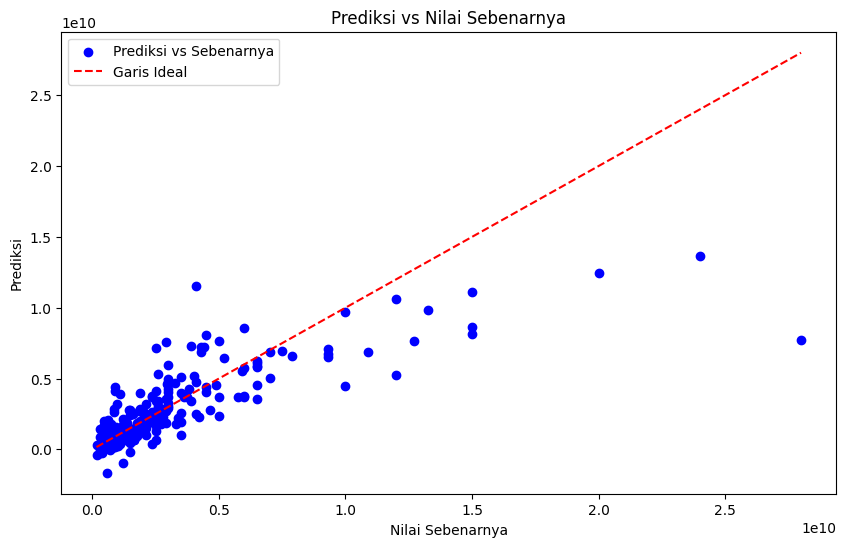

In [44]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', label='Prediksi vs Sebenarnya')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Garis Ideal')
plt.title('Prediksi vs Nilai Sebenarnya')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.legend()
plt.show()

In [45]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error rf: {mse}')
print(f'R-squared rf: {r2}')
print(f'Mean Absolute Error rf: {mae}')

Mean Squared Error rf: 2.7283341939802547e+18
R-squared rf: 0.7781886225180413
Mean Absolute Error rf: 693487880.9866368


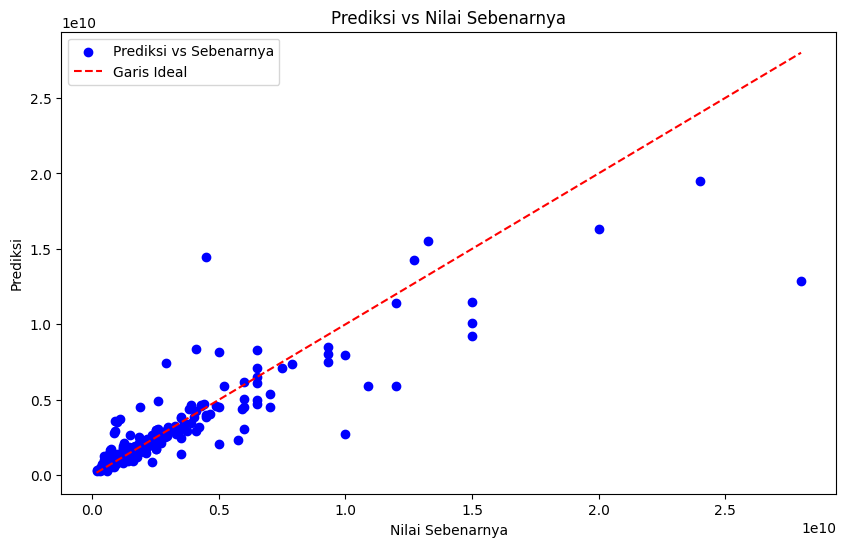

In [46]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', label='Prediksi vs Sebenarnya')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Garis Ideal')
plt.title('Prediksi vs Nilai Sebenarnya')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.legend()
plt.show()

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
model_gb = GradientBoostingRegressor()

model_gb.fit(X_train, y_train)

y_pred = model_gb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Gradient Boosting:')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

Gradient Boosting:
Mean Squared Error: 3.0719099634143657e+18
R-squared: 0.7502561885604454
Mean Absolute Error: 783596697.7549437


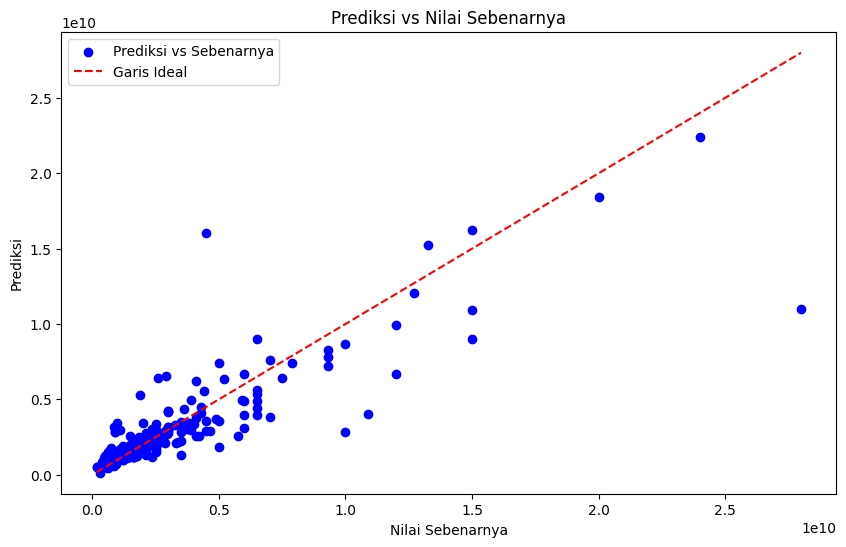

In [48]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', label='Prediksi vs Sebenarnya')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Garis Ideal')
plt.title('Prediksi vs Nilai Sebenarnya')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.legend()
plt.show()